# Péndulo ideal

[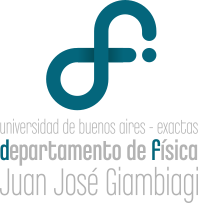](https://www.df.uba.ar/)

[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

>Bibliografía:  
>- Secciones 1.1 y 1.2  
  Ondas es física  
  Oscar E. Martinez   
  EUdeBA, 2008

# Enunciado
Escriba y resuelva las ecuaciones de movimiento para un péndulo de longitud $\ell$ en presencia de un campo gravitatorio de constante $g$.
Discuta todas las aproximaciones que realiza.  
![](figuras/pénduloHorizontal.png)  

# ¿Cómo plantear la resolución?
Recordamos que una vez hechas todas las aproximaciones para tratar al sistema como puntual y plantear un diagrama de cuerpo libre que nos permita entender que fuerzas actuan sobre tal partícula hay que llegar a plantear la **2.a ley de Newton**.

La escribiremos en función de la coordenada de interés en torno de la posición de punto de equilibrio. Para lograr esto hay dos alternativas:
- Determinar el punto de equilibrio en que $\sum \vec{F} = 0$ y escribir la descomposición de las $\vec{F}$ en la dirección de la mencionada coordenada.
- Escribir el potencial, encontrar su mínimo en función de la coordenada y desarrollarlo en serie en torno al mismo. Luego basta usar $\vec{F} = - \vec{\nabla} V$

El 2.o enfoque puede parecer tedioso a primera vista, pero se torna más y más práctico cuando el sistema se torna más complejo. Obviamente para los primeros ejercicios puede parecer impráctico, pero es bueno entrenarse en este proceder para preparse para lo que viene en la materia.

### Dibujo
Es una buena idea empezar haciendo un dibujo del sistema que se quiere estudiar.
Además de los "datos" $g,l$ debemos suponer que del péndulo cuelga alguna pesa con cierta masa $m$.

En el dibujo indico dos posibles coordenadas que podriamos usar para analizar al apartamiento de la posicíon vertical (de equilibrio): el ángulo $\varphi$, o el apartamiento horizontal $\psi$.

### Aproximaciones
Revisemos los aproximaciones que se asumieron implicitamente en el dibujo: 
- El movimiento siempre es en un plano. Siempre arriba o abajo, derecha o izquierda, pero nunca entra o sale de la pantall. Por tanto toda posición que asignemos tendrá componentes solo en los versores $\hat{r}$ y $\hat{\varphi}$.
- La cuerda es rígida, es decir no se curva, y es inextensible $\implies$ la posición de la masa es $\vec{r}= \ell \hat{r}$. 

### Desarrollo a partir del potencial
Considero que el potencial $V$ es nulo en el origen de coordenadas, es decir que donde se encuentra su mínimo $\varphi=0, V(\varphi=0)= -m g \ell$ y por tanto

$$
V(\varphi)= m g \left(- \ell \cos{\varphi} \right) = - m g \ell \cos{\varphi},
$$
que no es lineal con su variable $\varphi$.

Para linealizar $V$ se hace un desarrollo en serie de Taylor en torno a la posición de equilibrio del sistema, $\varphi = 0$.
El desarrollo se realiza hasta el primer orden en que surge dependencia con $\varphi$,
$$
V_\mathrm{apróximado}(\varphi)
= - m g \ell \left( \cos(0) - \sin(0) \varphi - \frac{\cos(0)}{2} \varphi^2 \right) 
= m g \ell \left( \frac{\varphi^2}{2} - 1 \right) .
$$

Comparemos la $V$ original y su aproximación...

In [1]:
# Primero importamos las bibliotecas de Python que vamos a usar
import numpy as np # numpy, de cálculo numérico, para vectores y matrices
import matplotlib.pyplot as plt # matplotlib para graficar
from matplotlib.style import use as meGusta
meGusta('fivethirtyeight') # estilo de gráficos con grilla y letras grandes

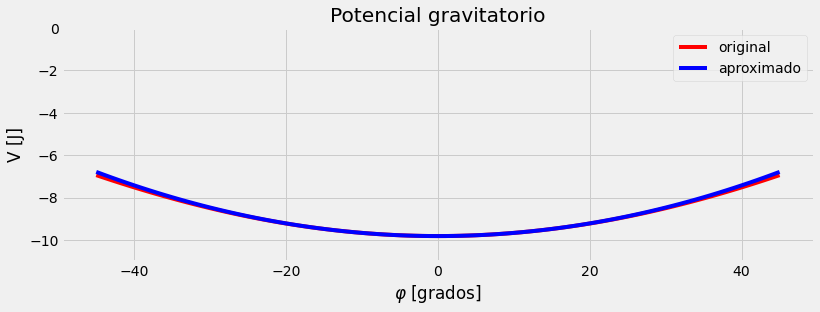

In [2]:
m = 1 # [kg]
g = 9.81 # [m s-2]
l = 1 # [m]

phis = np.arange(-45,46) # [⁰] vector de phis de a un grado desde -45 hasta 45 grados
vOriginal = m* g* l* (-np.cos(phis* np.pi/ 180)) # [J] vector con potencial real
vAproximado = m* g* l* ( (phis * np.pi/ 180)**2/ 2- 1) # [J] vector con potencial aproximado

fig, ax = plt.subplots(figsize=(12, 4) ) # crea una figura de 12 x 4
ax.set(ylim=[-11, 0], xlabel=r'$\varphi$ [grados]', ylabel='V [J]', title='Potencial gravitatorio')
ax.plot(phis, vOriginal, '-r', label='original') # grafica en los ejes el potencial
ax.plot(phis, vAproximado, '-b', label= 'aproximado') # y en los mismos el aproximado
ax.legend() # muestra las etiquetas (labels)

Como vemos la aproximación funciona bastante bien.
Conformes con ella calculamos la fuerza
$$
\vec{F} = - \vec{\nabla}V = - \left( \frac{\partial}{\partial r}, \frac{1}{r} \frac{\partial}{\partial \varphi}, \frac{\partial}{\partial z} \right) V(\varphi)
$$

Pero solo nos interesa aplicar la 2.a ley para lo que pasa en $\hat{\varphi}$

$$
m \ddot{\vec{r}} \cdot \hat{\varphi} = -\frac{1}{r} \frac{\partial}{\partial \varphi} V(\varphi)
$$

Como la aceleración en cílindricas es $\ddot{\vec{r}}= (\ddot r - r \dot{\varphi}^2) \hat{r} + (\dot{r} \dot{\varphi}^2 + r \ddot{\varphi}) \hat{\varphi} + \ddot{z} \hat{z}$ y el péndulo es rígido e inextensible $r \equiv \ell$

$$
\begin{aligned}
m \ell \ddot{\varphi} &= - \frac{1}{\ell} m g \ell \varphi \\
\ddot{\varphi} &= - \frac{g}{\ell} \varphi
\end{aligned}
$$
Y arribamos a una ecuación diferencial que debemos resolver. 

## Resolución de la ecuación diferencial
Voy a repasar todos los pasos para esta resolución, que de ahora en más podrán obviarse en otros problemas, pero es bueno haberlo revisto en su totalidad.

### La frecuencia de oscilación
Proponemos una solución $\varphi= \mathrm{e}^{\lambda t}$ que al aplicarla a la ecuación anterior

$$
    \begin{aligned}
    \lambda^2 \mathrm{e}^{\lambda t} &= - \frac{g}{\ell} \mathrm{e}^{\lambda t} \\
    \lambda^2 &= -\frac{g}{\ell} \\
    \lambda &= \pm \sqrt{\frac{g}{\ell}} i
    \end{aligned}
$$

Entonces la ecuación tiene por solución la combinación lineal de las dos correspondientes soluciones ($\pm$)

$$
    \varphi(t)= A_1 \mathrm{e}^{i \sqrt{\frac{g}{\ell}} t}+ A_2 \mathrm{e}^{-i \sqrt{\frac{g}{\ell}} t} .
$$

Estas exponenciales son períodicas en $\sqrt{\frac{g}{\ell}}$ por lo que este coeficiente de $t$ lo identificamos con la frecuencia angular $\omega= \sqrt{\frac{g}{\ell}}$

$$
    \varphi(t)= A_1 \mathrm{e}^{i \omega t}+ A_2 \mathrm{e}^{-i \omega t} .
$$ 

### Encontrando una solución real
No queremos un $\varphi$ complejo, sino uno real. Así que aplicamos el truco de sumar a la solución anterior su adjunta $\bar{\varphi}(t)$.
$$
\begin{aligned}
\Re{(\varphi(t))} 
&= \frac{1}{2} \left[ \varphi(t) + \bar{\varphi}(t) \right]  \\
& = \frac{1}{2} \left[ A_1 \mathrm{e}^{i \omega t}+ A_2 \mathrm{e}^{-i \omega t} + A_1^* \mathrm{e}^{-i \omega t}+ A_2^* \mathrm{e}^{i \omega t} \right] \\
&= \frac{1}{2} \left[ (A_1+ A_2^*) \mathrm{e}^{i \omega t}+ (A_1^*+ A_2) \mathrm{e}^{-i \omega t} \right] \\
&= \frac{1}{2} (A_1+ A_2^*) \mathrm{e}^{i \omega t}+ \text{complejo conjugado} .
\end{aligned}
$$
 
El obtener la adjunta es hacer dos cosas:
- conjugar los números complejos: cambiar el signo de sus argumentos, y
- transponer: en el caso más general los $A_n$ son vectores, no es el caso del péndulo, en que $A_n$ son solo un número. Por tanto $A_n^*$ denota al complejo conjugado de $A_n$.

Lo que acompaña la exponencial $\frac{1}{2} (A_1+ A_2^*)$ es un número complejo que puede resumirse en $B \mathrm{e}^{i \phi_0}$.
Con esto se puede escribir una solución real

$$
\begin{aligned}
\varphi(t) 
&= B \mathrm{e}^{i (\omega t+ \phi_0)} + B \mathrm{e}^{- i (\omega t+ \phi_0)} \\
&= B \left[ \cos{\left( \omega t+ \phi_0 \right) } + i \sin{\left( \omega t+ \phi_0 \right) } \right] 
 + B \left[ \cos{\left( \omega t+ \phi_0 \right) } - i \sin{\left( \omega t+ \phi_0 \right) } \right] \\
&= 2 B \cos{\left( \omega t+ \phi_0 \right) } \\
&= \boxed{ A \cos{\left( \omega t+ \phi_0 \right) } } \quad (2B =A)
\end{aligned}
$$

Y voilá, se obtiene la buscada ecuación de movimiento.
Pero aún no está determinada a menos que se conozcan las condiciones en algún $t$ de referencia para establecer:
- $A$ una amplitud máxmima de la oscilación $A$, y
- $\phi_0$ una fase inicial de la función trigonométrica (que tan alejada se encuentra la situación inicial de la máxima amplitud).

### Condiciones iniciales
En el problema del péndulo obtuvimos una solución que había que especializar en función de condiciones iniciales de amplitud máxima $A$ y de una un tanto "esotérica" fase inicial $\phi_0$, que para este problema sería
$$
  \varphi(t) = A \cos{\left( \omega t + \phi_0 \right)}.
$$

Antes de llegar a esta versión compacta habriamos pasado, cuando analizamos la frecuencia de oscilación, por la expresión
$$
\varphi(t)= A_1 \mathrm{e}^{i \omega t}+ A_2 \mathrm{e}^{-i \omega t},
$$

pero aquí ahorramos tiempo y utilizamos las relaciones de Euler $\mathrm{e}^{\pm i \theta}= \cos{\theta}+ i \sin{\theta}$ para escribir
$$
\varphi(t)= (A_1+ A_2) \cos{(\omega t)} +  i (A_1- A_2) \sin{(\omega t)}.
$$

Esta expresión es muy práctica pues si especializamos esta solución en $t=0$ solo queda $(A_1+ A_2)$, por lo que esto es $\varphi(0)$.
De igual manera la derivada en $t=0$ de tal solución $i \omega (A_1 - A_2)$ corresponderá a $\dot{\varphi}(0)$, entonces
$$
\begin{aligned}
  \varphi(0) &= (A_1 + A_2)\\
  \dot{\varphi}(0) &= i \omega (A_1 - A_2)
\end{aligned},
$$

permite escribir una solucíon en función de condiciones iniciales observables:
$$
\boxed{
  \varphi(t)= \varphi(0) \cos{(\omega t)} +  \frac{\dot{\varphi}(0)}{\omega} \sin{(\omega t)}
}.
$$

## Dinámica

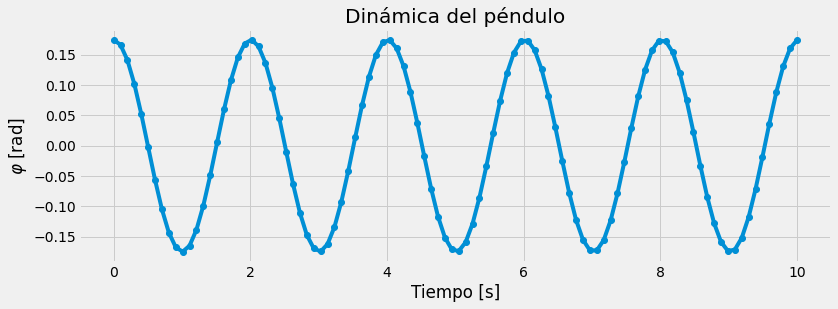

In [3]:
# condiciones iniciales péndulo
g = 9.81 # [m s-2]
l = 1 #  [m] longitud de la cuerda
omega = np.sqrt(g/l) # [rad s-1] frecuencia de oscilación
phi_0 = 10 # [⁰] amplitud inicial en grados
phi_0 *= np.pi/ 180 # [rad] grados -> radianes, *= multiplica el valor anterior de la variable
phi_punto_0 = 0 # [rad s-1] velocidad (angular) inicial

# graficación péndulo
tiempos = np.linspace(0, 10, 100) # [s] 100 tiempos equiespaciados entre 0 y 10 s
def phi(t): # se puede hacer una función en vez de calcular un vector a partir de los tiempos
    return phi_0* np.cos(omega* t) + (phi_punto_0/ omega)* np.sin(omega* t)

fig, ax = plt.subplots(figsize=(12, 4) ) # crea una figura de 12 x 4
ax.set(xlabel= 'Tiempo [s]', ylabel= r'$\varphi$ [rad]', title='Dinámica del péndulo')
ax.plot(tiempos, phi(tiempos), 'o-' )